<a href="https://colab.research.google.com/github/LWH4Data/Study-code/blob/main/%EA%B0%9C%EB%B0%9C%EC%9E%90%EB%A5%BC_%EC%9C%84%ED%95%9C_%EC%8B%A4%EC%A0%84_%EC%84%A0%ED%98%95%EB%8C%80%EC%88%98%ED%95%99_Chapter_5_%EC%97%B0%EC%8A%B5_%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 연습 문제 1 : 직접 해보기

행렬의 노름은 행렬이 갖는 숫자의 크기와 관련있음을 증명하는 문제

1. 10x10 난수 행렬을 만들고 Frobenius norm을 계산한다.
2. 1번 과정을 40번 반복하며 반복하는 동안 난수 행렬에 0~50 사이의 스칼라를 곱한다.
3. 1~2 번 과정을 10번 반복하여 40x10 노름으로 된 행렬을 생성한다.
4. 생성된 노름 행렬을 평균내어 시각화한다.

0.0


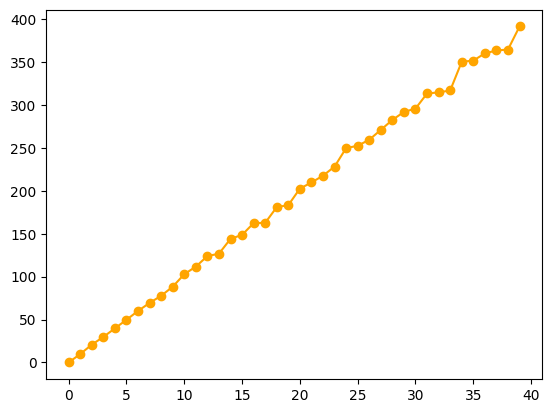

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Set the Frobenius matrix * Scalar matrix
N = np.zeros((40, 10))
S = np.zeros(40)
for i in range(0, 40):
  S[i] = i
random.shuffle(S)

# Create random matrix & compute
for i in range(0, 10):
  for j in range(0, 40):
    A = np.random.randn(10, 10)
    As = S[j]*A
    N[j, i] = np.linalg.norm(As)

# Compute the mean of matrix of Frobenius with axis = 1
Nmean = np.mean(N, axis = 1)
Nmean.sort()

# plot
print(Nmean[0])
plt.plot(Nmean, '-o', color = 'orange')

## 연습 문제 1 : 교채 풀이
1. np.linspace() 잊었다. 문제는 별다른 설명없이 0 ~ 50의 스칼라를 곱하라하지만 정확히는 0 ~ 50 사이의 정수 40개를 추출하여 곱한다.
2. plt.plot에서 바로 np.mean을 적용하였다. 아직 각종 함수에 익숙하지 않아 조금 투박하게 코딩을 하게 되는 듯하다.

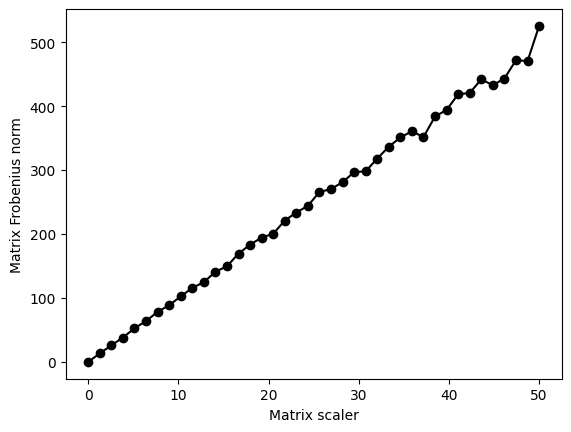

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# experiment simulations
scailingVals = np.linspace(0, 50, 40) # range of scaling parameters (0 to 50 in 40 steps)
nExperiments = 10

# initialize output
matrixNorms = np.zeros((len(scailingVals), nExperiments))

# run experiment!
for si in range(len(scailingVals)):
  for expi in range(nExperiments):

    # generate a random scaled matrix
    R = np.random.randn(10, 10) * scailingVals[si]

    # store its norm
    matrixNorms[si, expi] = np.linalg.norm(R, 'fro')

# plot the results
plt.plot(scailingVals, np.mean(matrixNorms, axis = 1), 'ko-')
plt.xlabel('Matrix scaler')
plt.ylabel('Matrix Frobenius norm')
plt.savefig('Figure_05_07.png', dpi = 300)
plt.show()

# check that norm = 0 for zeros matrix
print(matrixNorms[0, :])

---

## 연습 문제 2 : 직접 해보기
두 행렬 사이의 Frobenius 거리를 1로 만드는 스칼라를 찾는 알고리즘을 작성하는 문제.

1. 두 개의 행렬(같은 크기)을 입력 받아 두 행렬 사이의 Frobenius 거리를 반환하는 함수를 작성한다.
2. 두 개의 NxN(교재는 7) 난수 행렬과 행렬에 곱할 스칼라 s = 1(크기 조절)을 생성한다.
3. 크기를 조정하며 두 행렬의 Frobenius 거리를 구한다.
4. 프로베니우스 거리가 1이상이라면 스칼라(s)에 0.9를 곱한 뒤 다시 프로베니우스 거리를 구하는 것을 반복한다(while문 사용).
5. Frobenius 거리가 1 미만이 되면 while 루프를 종료하고 반복 횟수(스칼라에 0.9)를 곱한 횟수와 스칼라값을 기록한다.






In [ ]:
import numpy as np
import math

# Create function about computing Frobenius distance
def frob(A, B):
  C = np.zeros((len(A), len(A)))

  # A - B
  for i in range(0, len(A)):
    for j in range(0, len(A)):
      C[i, j] = A[i, j] - B[i, j]
  # Compute sum of squares
  dist = 0
  for i in range(0, len(C)):
    for j in range(0, len(C)):
      dist += C[i, j]**2
  # square root
  return math.sqrt(dist)


# Create two random vector
A = np.random.randn(7, 7)
B = np.random.randn(7, 7)

# Set scalar
s = 1
i = 0 # iteration.

while frob(A, B)*s >= 1:
  i += 1
  s = s*0.9
  frob(A, B)*s
  if frob(A, B)*s < 1:
    print('반복 횟수 : ', i+1, '스칼라값 : ', s*0.9)

반복 횟수 :  22 스칼라값 :  0.0984770902183612


## 연습 문제 2 : 교재 풀이
1. while 루프문을 잘 안쓰다 보니 반복 실행에 대해 count가 어색하다. 반복문 실행 count에 대해서 다음에 사용할 때에도 주의해야 겠다.
2. 교재 풀이는 M1-M2를 사용했다. 원소별 계산에 몰입되다 보니 나의 경우 원소별로 계산을 해주었는데 멍청한 생각이었다 ㅎㅎ...

In [ ]:
# Funtion to compute Euclidean distance

def EuclideanDistance(M1, M2):

  # matrix difference
  D = M1-M2

  # matrix distance
  return np.sqrt(np.sum(D**2))

In [ ]:
# optimization code

# create two matrices
N = 7
A = np.random.randn(N,N)
B = np.random.randn(N,N)

# optimization
numIters = 0
s = 1
while EuclideanDistance(s*A,s*B)>1:
  s *= .9
  numIters += 1

# report the results. Note that my loop code scales once more after criteria is reached,
# so I subtract one from numIters and undo the final s scaling.
print(f'Number of iterations: {numIters-1}')
print(f'Final value of scalar: {s/.9:.3f}')
print(f'Final Euclidean distance: {EuclideanDistance(s/.9*A,s/.9*B):.3f}')

Number of iterations: 21
Final value of scalar: 0.109
Final Euclidean distance: 1.081


Text(0, 0.5, 'Count')

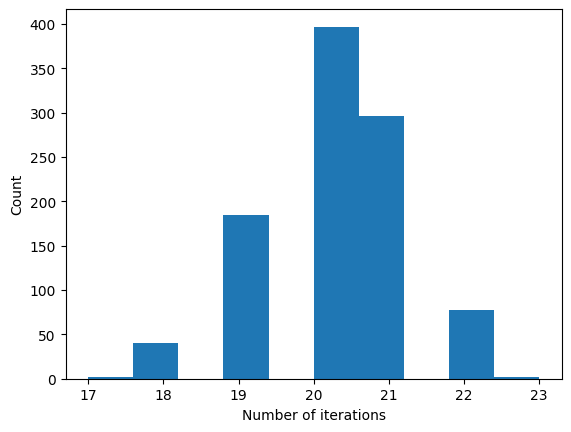

In [ ]:
# the code below isn't part of the exercise, but I was curious to repeat the optimization
# 1000 times to see the disttribution of numIters

nIters = np.zeros(1000)

for i in range(1000):
  # create two matrices
  A = np.random.randn(N, N)
  B = np.random.randn(N, N)

  numIters, s = 0, 1
  while EuclideanDistance(s*A, s*B)>1:
    s *= .9
    numIters += 1
  nIters[i] = numIters-1

plt.hist(nIters-1)
plt.xlabel('Number of iterations')
plt.ylabel('Count')

---

# 연습 문제 3 : 직접 해보기
대각합 연산과 유클리드 공식의 결과(Frobenius norm)가 동일함을 구현.
1. 대각합 공식은 A.T*A에서만동작하는가 아니면 AA.T에서도 결과가 동일한가?

In [ ]:
import numpy as np

# Create random matrix
A = np.random.randn(5, 5)

# trace calculation
At = np.sqrt(np.trace(np.dot(A.T, A)))

# Frobenius norm
Af = np.linalg.norm(A)

# Check that are the trace and Frobenius norm same
print(At)
print(Af)
print('두 결과가 동일하다면 둘의 차이는 0이 되어야 한다. \n At-Af : ', At-Af)

4.813693060554603
4.813693060554603
두 결과가 동일하다면 둘의 차이는 0이 되어야 한다. 
 At-Af :  0.0


## 연습 문제 3 : 교재 풀이
1. 나의 경우 함수를 주로 사용하여 연산을 하였고 교재의 경우 연산을 하였다.

In [ ]:
# Create a matrix
M = 50
A = np.random.randn(M, M)

# trace method
norm1 = np.sqrt(np.sum(np.diag(A.T@A)))

# Euclidean norm method
norm2 = np.sqrt(np.sum(A**2))

# if they're equal, their difference should be (very close to) zero.
norm1 - norm2

0.0

---

## 연습 문제 4 : 직접 해보기
행렬 이동이 행렬 노름에 미치는 영향에 대해 알아본다.

1. 10x10 난수 행렬을 만들고 Frobenius norm을 계산한다.
2. for 내부에 다음을 코딩한다.
*   노름의 일부만큼 행렬을 이동한다.
*   원래 행렬에서 노름의 변화율을 계산한다.
*   이동된 행렬과 원래 행렬 사이의 Frobenius 거리를 계산한다.
*   행렬의 원소사이의 상관계수를 계산한다(np.flatten()을 사용하여 벡터화된 행렬의 상관관계 계산).
3. 이동시킬 값인 노름의 비율은 0~1 사이를 30개의 단계로 나누어 진행
4. 루프의 각 반복에서 이전 반복에서 이동된 행렬이 아닌 원래 행렬을 사용.
5. 결과는 [그림 5-8]과 같아야 한다.



Text(0.5, 1.0, 'correlation')

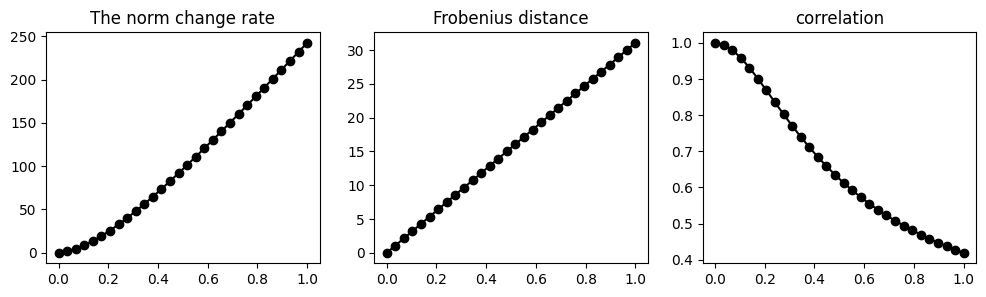

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create matrices & scalars
A = np.random.randn(10, 10)
Aflat = A.flatten()
I = np.identity(10)
n = np.linspace(0, 1, 30)
# compute the norm of A
Anorm = np.linalg.norm(A)

# set rate of norm change matrix, correlation matrix, and Frobenius distance
normChange = np.zeros(30)
coRe = np.zeros(30)
Frob = np.zeros(30)

# for loop
for i in range(0, 30):
  Am = A + n[i]*I*Anorm
  normChange[i] = (np.linalg.norm(Am)-np.linalg.norm(A))/np.linalg.norm(A) # norm change rate
  Frob[i] = np.sqrt(np.sum((A-Am)**2))
  Amflat = Am.flatten()
  coRe[i] = np.corrcoef(Aflat, Amflat)[0][1]

fig, axs = plt.subplots(1, 3, figsize = (12, 3))
axs[0].plot(n , normChange*100, '-ok')
axs[0].set_title('The norm change rate')
axs[1].plot(n, Frob, '-ok')
axs[1].set_title('Frobenius distance')
axs[2].plot(n, coRe, '-ok')
axs[2].set_title('correlation')

## 연습 문제 4 : 교재 풀이

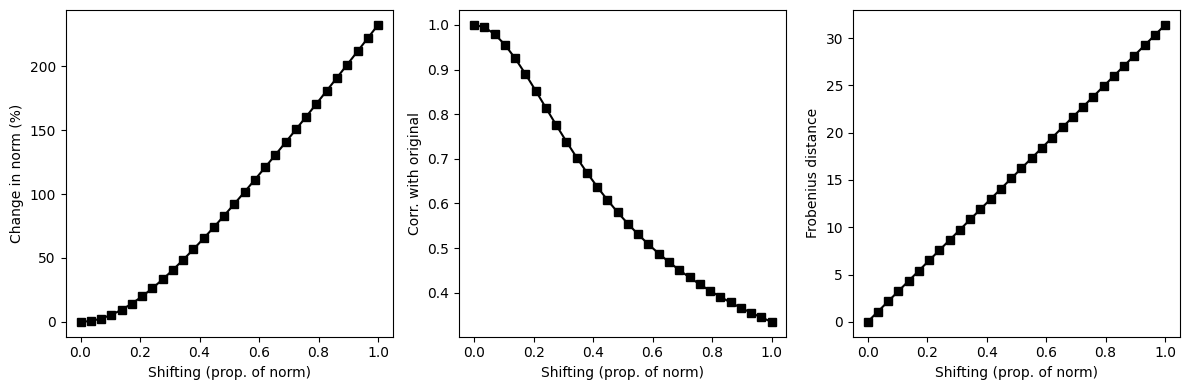

In [ ]:
# size of the matrix
N = 10

shifting = np.linspace(0,1,30)

# original matrix
A = np.random.randn(N,N)
normA = np.linalg.norm(A,'fro')

# initialize results matrices
shiftingResults = np.zeros( (len(shifting),3) )
resultsNames = [ 'Change in norm (%)','Corr. with original','Frobenius distance' ]



for si in range(len(shifting)):

  # shift the matrix
  As = A + shifting[si]*normA*np.eye(N)

  # get the new norm and transform to %-change
  normShift = np.linalg.norm(As,'fro')
  shiftingResults[si,0] = 100 * (normShift-normA)/normA

  # compute correlation
  shiftingResults[si,1] = np.corrcoef(A.flatten(),As.flatten())[0,1]

  # Frobenius distance
  shiftingResults[si,2] = EuclideanDistance(A,As)

## plotting!
_,axs = plt.subplots(1,3,figsize=(12,4))

for i in range(3):

  # plot the results
  axs[i].plot(shifting,shiftingResults[:,i],'ks-')
  axs[i].set_xlabel('Shifting (prop. of norm)')
  axs[i].set_ylabel(resultsNames[i])

plt.tight_layout()
plt.savefig('Figure_05_06.png',dpi=300)
plt.show()

---

## 연습 문제 5 : 직접 해보기
1. 임의의 계수를 가진 난수 행렬을 생성.
2. 계수가 r인 MxN 행렬을 만들려면 난수 Mxr 행렬에 rxN 행렬을 곱한다.
3. 파이썬에서 이를 구현하고 실제로 r인지 확인한다.
4. r > min{M, N}을 설정할 경우의 결과와 이유를 설명할 것.

In [ ]:
import numpy as np

# Create the two random matrices (rank = 7)
A = np.random.randn(10, 7)
B = np.random.randn(7, 9)

# multiply two matrices A & B
AB = A@B
np.linalg.matrix_rank(AB)

# r > min{M, N}인 경우에 Mxr, rxN 행렬의 곱으로 계수 r 행렬을 생성할 수 없다.
# 그 이유는 최소계수를 반환하게 되는데 r이 M 혹은 N 보다 크다면 곱해진 행렬의 경우 계수는 M 혹은 N이 된다.

7

## 연습 문제 5 : 교재 풀이

In [ ]:
# Make a matrix with specified size and rank

M = 5
N = 8
r = 3

A = np.random.randn(M, r) @ np.random.randn(r, N)

print(A.shape)
print(np.linalg.matrix_rank(A))

(5, 8)
3


---

## 연습 문제 6 : 직접 해보기
1. 더한 결과가 1) 계수-0, 2) 계수-1, 3) 계수-2가 되는 세 쌍의 계수-1 행렬을 만들어 행렬 계수 r(A+B) <= r(A) + r(B)의 덧셈 법칙을 확인한다.
3. 덧셈 대신 곱셈에 대해서도 문제를 풀어본다.


In [7]:
import numpy as np

# summmation
# rank = 0
A1 = np.array([[2, 2], [5, 5]])
B1 = -1 * A1
r1 = np.linalg.matrix_rank(A1+B1)
print(r1)

# rank = 1
A2 = np.array([[2, 2], [5, 5]])
B2 = np.array([[2, 2], [5, 5]])
r2 = np.linalg.matrix_rank(A2+B2)
print(r2)

# rank = 2
A3 = np.array([[2, 2], [5, 5]])
B3 = np.array([[3, 5], [3, 5]])
r3 = np.linalg.matrix_rank(A3+B3)
print(r3)

# multiplication
# rank = 0
C1 = np.array([[3, 0], [6, 0]])
D1 = np.array([[0, 2], [0, 4]])
print(np.linalg.matrix_rank(C1*D1))

# rank = 1
C2 = np.array([[3, 3], [0, 0]])
D2 = np.array([[1, 2], [0, 0]])
print(np.linalg.matrix_rank(C2*D2))

# rank = 2
# 계수의 곱셈 법칙으로 인해 rank-1인 두 행렬로는 rank-2의 행렬을 만들 수 없다.

0
1
2
0
1
1


## 연습 문제 6 : 교재 풀이
1. 교재 풀이는 대각 행렬을 이용한다 (놀랍다).
2. rank에 관한 곱셈 법칙은 아다마르곱이 아닌 표준 행렬 곱셈이다(직접 풀 때 실수).

In [8]:
# summed matrix has rank-0

A = np.diag([ 1, 0, 0, 0, 0])
B = np.diag([-1, 0, 0, 0, 0])
C = A+B

# print out their ranks
np.linalg.matrix_rank(A), np.linalg.matrix_rank(B), np.linalg.matrix_rank(C)

(1, 1, 0)

In [9]:
# summed matrix has rank-1

A = np.diag([1, 0 ,0, 0, 0])
B = np.zeros(A.shape)
B[0, 1] = 10
C = A + B

# print out their ranks
np.linalg.matrix_rank(A), np.linalg.matrix_rank(B), np.linalg.matrix_rank(C)

(1, 1, 1)

In [10]:
# random matrix has rank-2

A = np.diag([1, 0, 0, 0, 0])
B = np.diag([0, 1, 0, 0, 0])
C = A+B

# print out their ranks
np.linalg.matrix_rank(A), np.linalg.matrix_rank(B), np.linalg.matrix_rank(C)

(1, 1, 2)

In [11]:
# random matrices have maximum possible rank!
A = np.random.randn(5, 1) @ np.random.randn(1, 5)
B = np.random.randn(5, 1) @ np.random.randn(1, 5)
C = A+B

# print out their ranks
np.linalg.matrix_rank(A), np.linalg.matrix_rank(B), np.linalg.matrix_rank(C)

(1, 1, 2)

---

## 연습 문제 7 : 직접 해보기
1. [연습 문제 5-5]의 코드를 매개변수 M과 r을 입력으로 받아 계수-r인 MxM 난수 행렬을 출력하는 파이썬 함수에 넣는다.
2. 이중 for 루프에서 2부터 15까지의 각 계수를 갖는 20x20 행렬 쌍을 만든다.
3. 행렬들을 더한 결과 행렬의 계수와 곱한 결과 행렬의 계수를 저장한다.
4. 계수를 행렬로 만들어서 [그림 5-9]와 같이 개별 행렬의 계수로 시각화 할 수 있다.

행렬 20x20 A와 B를 받는다. 이때 A와 B는 다른 계수를 받음. <br>
A+B의 계수를 받는 행렬<br>
A@B의 계수를 받는 행렬.

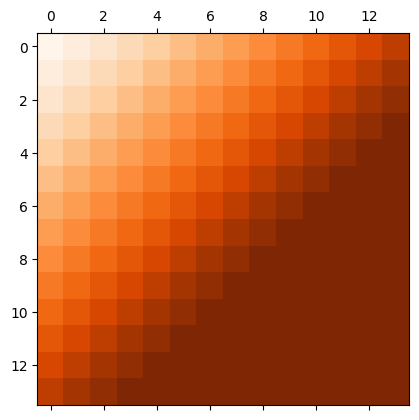

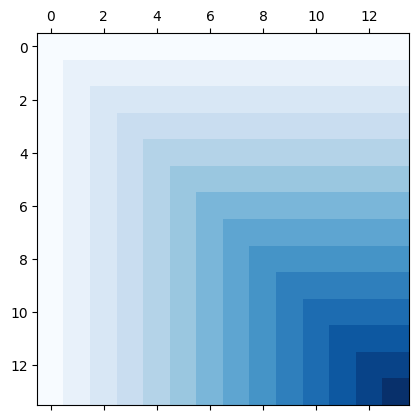

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Generate function
def rankf(dimension, rank):
  A = np.random.randn(dimension, int(rank))
  B = np.random.randn(int(rank), dimension)
  return A@B

# Set initial varible
M = 20
r = np.linspace(2, 15, 14)
ApB = np.zeros((14, 14))
AmB = np.zeros((14, 14))

# Generate summation matrix & multiplication matrix using double for loop
for i in range(0, 14):
  for j in range(0, 14):
    ApB[i, j] = np.linalg.matrix_rank(rankf(M, r[i]) + rankf(M, r[j]))
    AmB[i, j] = np.linalg.matrix_rank(rankf(M, r[i]) @ rankf(M, r[j]))

# plot
plt.matshow(ApB, cmap = plt.cm.Oranges)
plt.matshow(AmB, cmap = plt.cm.Blues)



## 연습 문제 7 : 교재 풀이
1. 생각보다 교재의 풀이와 동일해서 놀랐다.
2. 나의 경우 두 행렬의 합과 곱의 결과를 각기 다른 행렬에 입력하였는데 교재의 경우 하나의 행렬에 모두 포함하였다. 아래 부분 코드가 해당된다.
```
# 교재
    Ranks[i, j, 0] = np.linalg.matrix_rank(S)
    Ranks[i, j, 1] = np.linalg.matrix_rank(M)
# 나의 풀이
    ApB[i, j] = np.linalg.matrix_rank(rankf(M, r[i]) + rankf(M, r[j]))
    AmB[i, j] = np.linalg.matrix_rank(rankf(M, r[i]) @ rankf(M, r[j]))
```

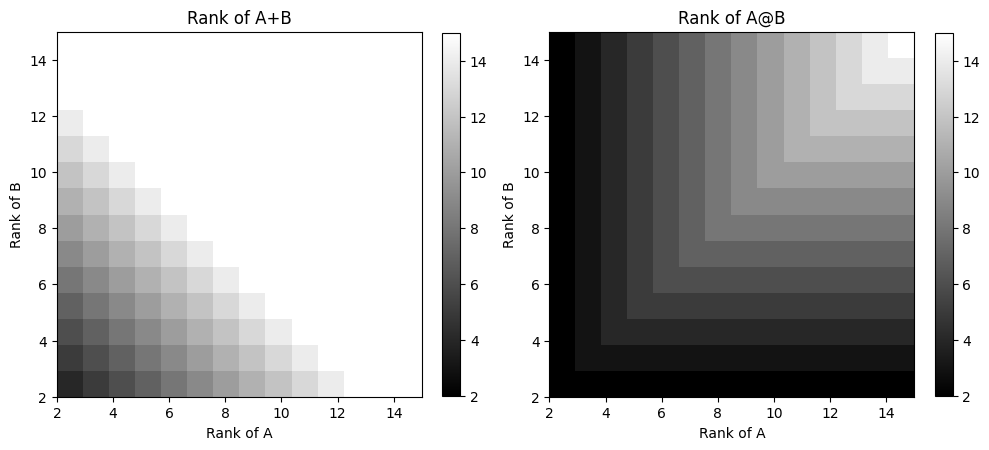

In [63]:
# the function
def makeAmatrix(M, r):
  return np.random.randn(M, r) @ np.random.randn(r, M)

# parameters
matSize = 20 # matrix size (square)
rs = range(2, 16) # range of ranks

# initialize results matrix
Ranks = np.zeros((len(rs), len(rs), 2))

# run the simulation
for i in range(len(rs)):
  for j in range(len(rs)):

    # create the matrices
    S = makeAmatrix(matSize, rs[i]) + makeAmatrix(matSize, rs[j])
    M = makeAmatrix(matSize, rs[i]) @ makeAmatrix(matSize, rs[j])

    # compute their ranks
    Ranks[i, j, 0] = np.linalg.matrix_rank(S)
    Ranks[i, j, 1] = np.linalg.matrix_rank(M)


## visualization
fig, axs = plt.subplots(1, 2, figsize = (10, 6))
s = '+@' # symbols for title

for i in range(2):

  # draw heatmat
  h = axs[i].imshow(Ranks[:, :, i], vmin = np.min(rs), vmax=np.max(rs), origin = 'lower',
                    extent = (rs[0], rs[-1], rs[0], rs[-1]), cmap = 'gray')

  # add colorbar and other niceties
  fig.colorbar(h, ax = axs[i], fraction = .045)
  axs[i].set_xlabel('Rank of A')
  axs[i].set_ylabel('Rank of B')
  axs[i].set_title(f'Rank of A{s[i]}B')

plt.savefig('Figure_05_09.png', dpi = 300)
plt.tight_layout()
plt.show()

---

## 연습 문제 8 : 직접 해보기
1. A, A.T, A.T@A, A@A.T 의 계수는 모두 동일하다.
2. 다양한 크기의 행렬을 통해 위를 확인할 것.

In [68]:
import numpy as np

# Generate random matrix
A = np.random.randn(7, 3)

print(np.linalg.matrix_rank(A))
print(np.linalg.matrix_rank(A.T))
print(np.linalg.matrix_rank(A.T@A))
print(np.linalg.matrix_rank(A@A.T))

3
3
3
3


## 연습 문제 8 : 교재 풀이
1. 개별 print()를 사용하지 않는다는 점.

In [69]:
# matrix sizes and rank
M = 15
N = 8
r = 4

# compute the four matrices
A = np.random.randn(M, r) @ np.random.randn(r, N)
At = A.T
AtA = A.T@A
AAt = A@A.T

# print their ranks
print(
    np.linalg.matrix_rank(A),
    np.linalg.matrix_rank(At),
    np.linalg.matrix_rank(AtA),
    np.linalg.matrix_rank(AAt)
)

4 4 4 4


---

## 연습 문제 9 : 직접 해보기
문제의 목적은 행렬 A의 열공간에 속하는 벡터 v의 답을 구하는 것.

1. 정규 분포에서 무작위 수를 추출하여 계수-3, 4x3 행렬 A와 4개의 원소를 갖는 벡터 v를 생성.
2. 앞서 설명한 알고리즘을 이용하여 벡터가 열공간에 있는지 확인. (벡터를 추가하여 계수를 계산하였을 때 계수가 증가하지 않는다면 선형 종속적이므로 벡터는 열공간에 존재, 선형 독립은 열공간 존재 X)
3. 코드를 여러번 실행하며 일관된 패턴을 보이는지 확인
4. 4x4 행렬 A, 계수-4 행렬을 사용할 때 행렬 A에 항상 v가 열공간에 속함을 확신할 수 있는데 이 이유에 대해 서술.
5. 테스트 결과에 따라 True 또는 False를 반환하고 벡터 크기가 확장된 행렬과 일치하지 않을 때 예외를 발생시키는 함수에 코드를 넣기.


In [81]:
import numpy as np

# Create random 4x3 matrix
A = np.random.randn(4, 3)
v = np.random.randn(4)

# Concat the vector v to matrix A
v = v.reshape(4, 1)
Av = np.hstack((A, v))

# print ranks
print(np.linalg.matrix_rank(A),
      np.linalg.matrix_rank(Av))

# 4x4 난수 행렬의 계수는 4 이다. 즉, 행렬의 최대계수는 4차원이고 열공간도 4차원이 되어 4차원의 모든 벡터를 열공간에 포함한다.
# 따라서 4개의 원소를 갖는 벡터 v는 4x4 행렬 A의 열공간에 포함될 수밖에 없다.

3 4


In [90]:
# Create function
def isRank(mat, vec):
  matv = np.hstack((mat, vec))
  try:
    np.linalg.matrix_rank(mat)==np.linalg.matrix(matv)
  except:
    print('False')

# Test
isRank(A, v)

False


## 연습 문제 9 : 교재 풀이
1. 나의 경우 try except 문을 사용하였고 교재의 경우 if raise문을 사용하였다.

In [91]:
# function to run algorithm
def is_V_inColA(A, v):

  # check sizes
  if A.shape[0]!=v.shape[0]:
    raise Exception('Size mismatch! A and v must have the same column dimensionally!')

  # compute ranks
  rankA = np.linalg.matrix_rank(A)
  rankAv = np.linalg.matrix_rank( np.hstack((A, v)) )

  # function outputs TRUE if v Win C(A)
  return rankA==rankAv

# create matrix and vector
A = np.random.randn(4, 3)
v = np.random.randn(4, 1)

# test
is_V_inColA(A, v)

False

---

## 연습 문제 10 : 직접 해보기
축소계수 행렬의 행렬식은 이론적으로 0임을 시험 해보는 문제. 컴퓨터로 적확하게 행렬식을 계산할 때 어려움을 보임.

<br>

1. 정방 난수 행렬을 만든다.
2. 행렬의 계수를 줄인다(한 열을 다른 열의 배수로 설정).
3. 행렬식을 계산하고 절댓값을 저장.

4. 위의 세 단계를 이중 for loop에서 실행한다. 첫 번째 루프는 3x3에서 30x30까지 수행. 두 번째 루프는 세 단계를 100번 반복(노이즈를 시뮬레이션).
5. 행렬의 원소 수에 대한 함수로 100회에 걸쳐 평균화된 행렬식을 선차트로 그린다.
6. 로그 척도와 선형 척도로 시각화를 하고 비교.



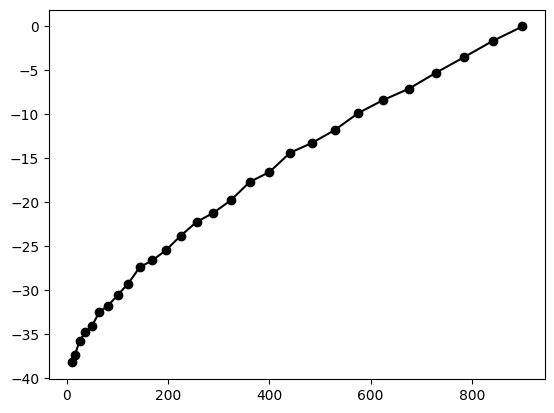

In [135]:
import numpy as np
import matplotlib.pyplot as plt

T = np.zeros((28, 100))
Num = np.zeros(28)

for i in range(3, 31):
  Num[i-3] = i**2
  for j in range(0, 100):
    A = np.random.randn(i, i)
    A[i-1] = 2*A[0]
    T[i-3, j] = np.abs(np.linalg.det(A))

plt.plot(Num, np.log(Tm), '-ko')



## 연습 문제 10 : 교재 풀이
1. x축을 np.array로 생성함.
2. 특정 범위를 줄 때 i로 iteration을 설정하지 않고 len()과 변수를 초기화하여 사용하면 편함.

> len()을 iteration에 활용할 수 있다는 것 인지.

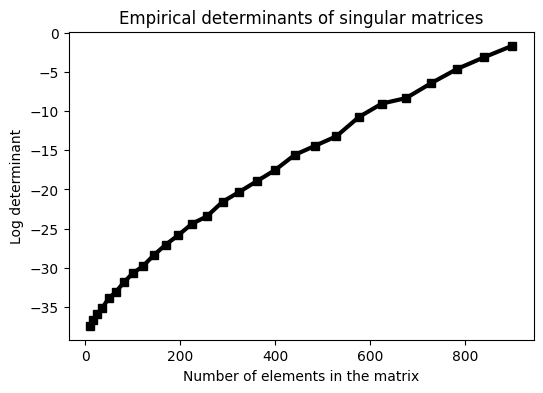

In [139]:
# matrix sizes
ns = np.arange(3, 31)

# iteration
iters = 100

# initialize
dets = np.zeros((len(ns), iters))

# loop over matrix sizes
for ni in range(len(ns)):
  for i in range(iters):

    # step 1
    A = np.random.randn(ns[ni], ns[ni])

    # step 2
    A[:, 0] = A[:, 1]

    # step 3
    dets[ni, i] = np.abs(np.linalg.det(A))

# note: the number of elements in a square matrix is the columns squared

# plotting
plt.figure(figsize = (6,4))
plt.plot(ns**2, np.log(np.mean(dets, axis = 1)), 'ks-', linewidth = 3)
plt.xlabel('Number of elements in the matrix')
plt.ylabel('Log determinant')
plt.title('Empirical determinants of singular matrices')
plt.savefig('Figure_05_10.png', dpi = 300)
plt.show()